## Шаг 1. Загрузка данных 

In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
import shap 

In [88]:
pip install shap 

     |████████████████████████████████| 539 kB 342 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [90]:
RANDOM_STATE = 280125 

In [2]:
try:
    data_arc_new = pd.read_csv('/datasets/data_arc_new.csv') 
except:
    print(f"Файл {file_path} не найден.")

In [3]:
data_arc_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [4]:
data_arc_new.head() 

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [5]:
try: 
    data_bulk_new = pd.read_csv('/datasets/data_bulk_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [6]:
data_bulk_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [7]:
data_bulk_new.head() 

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [8]:
try: 
    data_bulk_time_new = pd.read_csv('/datasets/data_bulk_time_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [9]:
data_bulk_time_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [10]:
data_bulk_time_new.head() 

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [11]:
try: 
    data_gas_new = pd.read_csv('/datasets/data_gas_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [12]:
data_gas_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [13]:
data_gas_new.head() 

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [14]:
try: 
    data_temp_new = pd.read_csv('/datasets/data_temp_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [15]:
data_temp_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [16]:
data_temp_new.head() 

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [17]:
try: 
    data_wire_new = pd.read_csv('/datasets/data_wire_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [18]:
data_wire_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [19]:
data_wire_new.head() 

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
try: 
    data_wire_time_new = pd.read_csv('/datasets/data_wire_time_new.csv') 
except: 
    print(f"Файл {file_path} не найден.") 

In [21]:
data_wire_time_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [22]:
data_wire_time_new.head() 

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные загружены, они содержат много пропусков. На следдующем этапе рассмотрим подробнее каждый датафрейм и проведем предобработку. 

## Шаг 2. Исследовательский анализ и предобработка данных 

Проведем исследовательский анализ датайреймов. Начнем с data_arc_new 

In [23]:
data_arc_new.describe() 

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [24]:
data_arc_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Приведем названия стоолбцов к нижнему регистру и уберем пробелы 

In [25]:
data_arc_new.columns = [col.lower().replace(' ', '_') for col in data_arc_new.columns]

In [26]:
data_arc_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   начало_нагрева_дугой  14876 non-null  object 
 2   конец_нагрева_дугой   14876 non-null  object 
 3   активная_мощность     14876 non-null  float64
 4   реактивная_мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [27]:
data_arc_new.duplicated().sum() 

0

In [28]:
data_arc_new.head(10) 

,key,начало_нагрева_дугой,конец_нагрева_дугой,активная_мощность,реактивная_мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


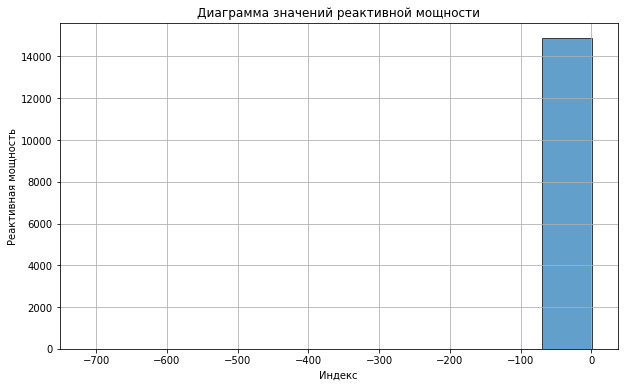

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(data_arc_new['реактивная_мощность'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Диаграмма значений реактивной мощности')
plt.xlabel('Индекс')
plt.ylabel('Реактивная мощность')
plt.grid(True)
plt.show()

Удалим выброс 

In [30]:
min_index = data_arc_new['реактивная_мощность'].idxmin()

data_arc_new = data_arc_new.drop(min_index)

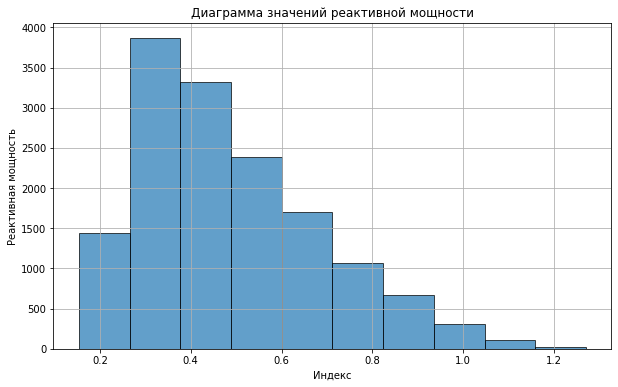

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(data_arc_new['реактивная_мощность'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Диаграмма значений реактивной мощности')
plt.xlabel('Индекс')
plt.ylabel('Реактивная мощность')
plt.grid(True)
plt.show() 

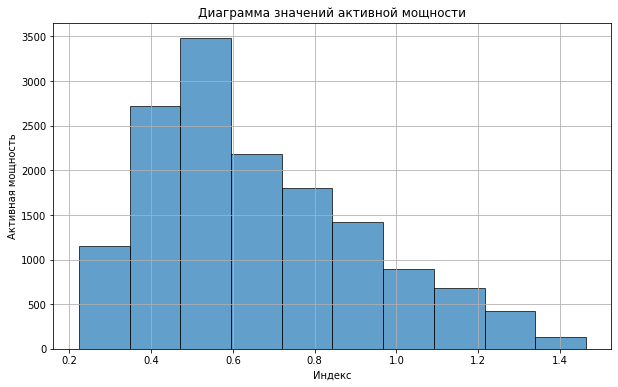

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(data_arc_new['активная_мощность'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Диаграмма значений активной мощности')
plt.xlabel('Индекс')
plt.ylabel('Активная мощность')
plt.grid(True)
plt.show()

Далее найдем полную мощность. Ее можно найти по теореме Пифагора - 

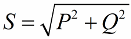

In [33]:
data_arc_new['начало_нагрева_дугой'] = pd.to_datetime(data_arc_new['начало_нагрева_дугой'])
data_arc_new['конец_нагрева_дугой'] = pd.to_datetime(data_arc_new['конец_нагрева_дугой'])
data_arc_new['полная_мощность'] = (data_arc_new['активная_мощность']**2 + data_arc_new['реактивная_мощность']**2)**(0.5)
data_arc_new['время_нагрева_дугой'] = (data_arc_new['конец_нагрева_дугой'] - data_arc_new['начало_нагрева_дугой']).astype('timedelta64[s]')
data_arc_new['время_нагрева_дугой'] = data_arc_new['время_нагрева_дугой'].astype(int)


Найдем затраты электроэнегрии, умножив полную мощность на длительность нагрева дугой 

In [34]:
data_arc_new['затраты_электроэнергии'] = data_arc_new['полная_мощность']*data_arc_new['время_нагрева_дугой']

In [35]:
data_arc_new.head() 

,key,начало_нагрева_дугой,конец_нагрева_дугой,активная_мощность,реактивная_мощность,полная_мощность,время_нагрева_дугой,затраты_электроэнергии
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148,159.830252


Рассмотрим таблицу Данные о подаче сыпучих материалов (объём) 

In [36]:
data_bulk_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Для начала так же приведем в нижнему регистру названия стоблоцов и уберем пробелы 

In [37]:
data_bulk_new.columns = [col.lower().replace(' ', '_') for col in data_bulk_new.columns] 

In [38]:
data_bulk_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


Пропуски в присадках (bulk) заменим на 0 

In [39]:
data_bulk_new = data_bulk_new.fillna(0)

In [40]:
data_bulk_new.head() 

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


Перейдем к датасет data_bulk_time_new 

In [41]:
data_bulk_time_new.describe() 

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [42]:
data_bulk_time_new.head() 

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [43]:
data_bulk_time_new.columns = [col.lower().replace(' ', '_') for col in data_bulk_time_new.columns] 

In [44]:
data_bulk_time_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Рассмотрим data_gas_new 

In [45]:
data_gas_new.columns = [col.lower().replace(' ', '_') for col in data_gas_new.columns] 

In [46]:
data_gas_new.describe() 

,key,газ_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [47]:
data_gas_new.head() 

,key,газ_1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


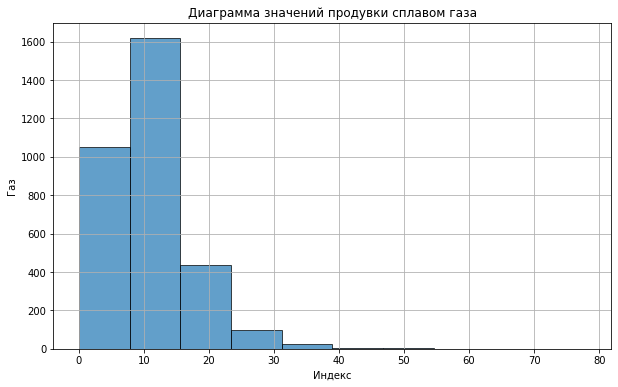

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(data_gas_new['газ_1'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Диаграмма значений продувки сплавом газа')
plt.xlabel('Индекс')
plt.ylabel('Газ')
plt.grid(True)
plt.show() 

Рассмотрим data_temp_new 

In [49]:
data_temp_new.describe() 

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [50]:
data_temp_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [51]:
data_temp_new.columns = [col.lower().replace(' ', '_') for col in data_temp_new.columns] 

In [52]:
data_temp_new.head() 

,key,время_замера,температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [53]:
len(data_temp_new.query('температура < 1400'))

5

In [54]:
data_temp_new.query('температура < 1400')

,key,время_замера,температура
4883,867,2019-06-06 08:03:39,1191.0
6784,1214,2019-06-18 08:01:03,1208.0
9050,1619,2019-07-03 02:34:41,1218.0
11495,2052,2019-07-25 08:49:15,1227.0
14283,2561,2019-08-12 18:49:29,1204.0


Удалим строки с температурой ниже 1400, так как это температура кристаллизации, а не плавления 

In [55]:
data_temp_new = data_temp_new.query('температура >= 1400')

In [56]:
data_temp_new.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14660 entries, 0 to 18086
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           14660 non-null  int64  
 1   время_замера  14660 non-null  object 
 2   температура   14660 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 458.1+ KB


In [57]:
data_temp_new['температура'].isna().sum() 

0

Заодно удалили пропуски, они неинформативны 

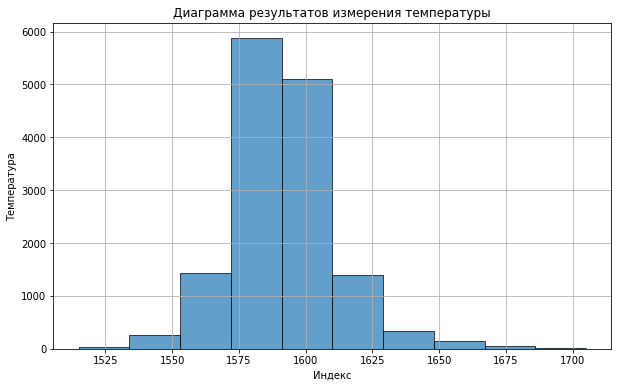

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(data_temp_new['температура'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Диаграмма результатов измерения температуры')
plt.xlabel('Индекс')
plt.ylabel('Температура')
plt.grid(True)
plt.show() 

Выглядит нормально 

Перейдем к датасету data_wire_new 

In [59]:
data_wire_new.describe() 

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [60]:
data_wire_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [61]:
data_wire_new.columns = [col.lower().replace(' ', '_') for col in data_wire_new.columns] 

Заменим пропуски на 0 

In [62]:
data_wire_new = data_wire_new.fillna(0) 

In [63]:
data_wire_new.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [64]:
data_wire_new.head() 

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Мы рассмотрели имеющиеся датасеты, избавлись от аномалий и заполнили пропуски при необходимости. Далее необходимо будет добавить некоторые столбцы и объединить данные. 

## Шаг 3. Объединение данных 

Для начала суммируем данные о присадках для каждого ковша и сохраним сумму в столбец bulk_sum таблицы data_bulk_new 

In [65]:
data_bulk_new.head() 

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


In [66]:
data_bulk_new['bulk_sum'] = data_bulk_new.iloc[:, 1:].sum(axis=1) 


In [67]:
data_bulk_new.head() 

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0


Далее для работы нам понадобится конечная температура ковша как целевой признак. Эта информация хранится в таблице data_temp_new. Для каждой партии есть несколько температур со временм замера. Нам нужно выделить конечную для каждого. 

In [68]:
data_temp_new.head() 

,key,время_замера,температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


In [69]:
temp = data_temp_new

In [70]:
temp['время_замера'] = pd.to_datetime(temp['время_замера'])


In [71]:
temp = temp.groupby('key').agg(
    первое_измерение=('температура', 'first'),
    последнее_измерение=('температура', 'last')
).reset_index()

In [72]:
temp.head() 

,key,первое_измерение,последнее_измерение
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0


In [73]:
temp.query('первое_измерение == последнее_измерение')

,key,первое_измерение,последнее_измерение
60,63,1580.0,1580.0
192,195,1583.0,1583.0
194,197,1582.0,1582.0
259,262,1596.0,1596.0
276,279,1603.0,1603.0
...,...,...,...
3210,3237,1569.0,1569.0
3211,3238,1584.0,1584.0
3212,3239,1598.0,1598.0
3213,3240,1617.0,1617.0


In [74]:
temp = temp.query('первое_измерение != последнее_измерение')

In [75]:
temp.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2432 entries, 0 to 2476
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  2432 non-null   int64  
 1   первое_измерение     2432 non-null   float64
 2   последнее_измерение  2432 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 76.0 KB


Объединим датасеты в итоговый 

In [76]:
data_arc_new.head() 

,key,начало_нагрева_дугой,конец_нагрева_дугой,активная_мощность,реактивная_мощность,полная_мощность,время_нагрева_дугой,затраты_электроэнергии
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148,159.830252


In [77]:
data_arc_new = data_arc_new.groupby('key').sum().reset_index()


In [78]:
data_arc_new.head() 

,key,активная_мощность,реактивная_мощность,полная_мощность,время_нагрева_дугой,затраты_электроэнергии
0,1,3.036730,2.142821,3.718736,1098,770.282114
1,2,2.139408,1.453357,2.588349,811,481.760005
2,3,4.063641,2.937457,5.019223,655,722.837668
3,4,2.706489,2.056992,3.400038,741,683.455597
4,5,2.252950,1.687991,2.816980,869,512.169934


In [79]:

dss = [data_bulk_new, temp, data_wire_new, data_gas_new]
data_all = data_arc_new
for ds in dss:
    data_all = data_all.merge(ds, on=['key'])
data_all.head(10) 

,key,активная_мощность,реактивная_мощность,полная_мощность,время_нагрева_дугой,затраты_электроэнергии,bulk_1,bulk_2,bulk_3,bulk_4,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,газ_1
0,1,3.036730,2.142821,3.718736,1098,770.282114,0.0,0.0,0.0,43.0,...,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.749986
1,2,2.139408,1.453357,2.588349,811,481.760005,0.0,0.0,0.0,73.0,...,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.555561
2,3,4.063641,2.937457,5.019223,655,722.837668,0.0,0.0,0.0,34.0,...,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.554793
3,4,2.706489,2.056992,3.400038,741,683.455597,0.0,0.0,0.0,81.0,...,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.841219
4,5,2.252950,1.687991,2.816980,869,512.169934,0.0,0.0,0.0,78.0,...,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.413692
5,6,2.725274,1.881313,3.313074,952,839.231310,0.0,0.0,0.0,117.0,...,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.273392
6,7,2.626877,1.960419,3.283913,673,613.576982,0.0,0.0,0.0,117.0,...,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.836267
7,8,2.678958,2.096952,3.405956,913,619.129542,0.0,0.0,0.0,99.0,...,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.171553
8,9,3.520820,2.527365,4.335261,625,570.113675,0.0,0.0,0.0,117.0,...,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.216623
9,10,3.118778,2.154941,3.791005,825,533.482050,0.0,0.0,0.0,0.0,...,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.529891


In [80]:
data_all.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 0 to 2291
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   key                     2292 non-null   int64  
 1   активная_мощность       2292 non-null   float64
 2   реактивная_мощность     2292 non-null   float64
 3   полная_мощность         2292 non-null   float64
 4   время_нагрева_дугой     2292 non-null   int64  
 5   затраты_электроэнергии  2292 non-null   float64
 6   bulk_1                  2292 non-null   float64
 7   bulk_2                  2292 non-null   float64
 8   bulk_3                  2292 non-null   float64
 9   bulk_4                  2292 non-null   float64
 10  bulk_5                  2292 non-null   float64
 11  bulk_6                  2292 non-null   float64
 12  bulk_7                  2292 non-null   float64
 13  bulk_8                  2292 non-null   float64
 14  bulk_9                  2292 non-null   

Мы объеденили исходные данные в один датафрейм по ключу key. Добавили некоторые признаки - bulk_sum (сумма присыпок) и конечная температура ковша (целевой признак) 

## Шаг 4. Исследовательский анализ и предобработка данных объединённого датафрейма 

In [81]:
data_all.corr() 

,key,активная_мощность,реактивная_мощность,полная_мощность,время_нагрева_дугой,затраты_электроэнергии,bulk_1,bulk_2,bulk_3,bulk_4,...,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,газ_1
key,1.000000,-0.021744,-0.019935,-0.021083,-0.030574,-0.019234,-0.073973,-0.005953,-0.005445,-0.027461,...,-0.016707,0.045520,-0.027019,0.049866,NaN,-0.007853,0.037396,-0.035982,0.021832,-0.044232
активная_мощность,-0.021744,1.000000,0.992452,0.999034,0.721642,0.819016,0.102387,0.091488,0.099998,0.002684,...,0.136537,0.064595,0.054853,0.103654,NaN,0.056350,0.061784,0.034529,-0.023913,0.371044
реактивная_мощность,-0.019935,0.992452,1.000000,0.996879,0.713509,0.815711,0.098817,0.088115,0.097825,0.002113,...,0.136895,0.063828,0.055731,0.102088,NaN,0.054208,0.067243,0.029063,-0.020479,0.368101
полная_мощность,-0.021083,0.999034,0.996879,1.000000,0.720015,0.819264,0.101287,0.090472,0.099434,0.002474,...,0.136934,0.064451,0.055228,0.103288,NaN,0.055707,0.063869,0.032654,-0.022640,0.370637
время_нагрева_дугой,-0.030574,0.721642,0.713509,0.720015,1.000000,0.900726,0.104790,0.038129,0.091584,-0.030549,...,0.052843,0.055628,0.033105,0.054872,NaN,0.042062,0.027661,0.017675,-0.012072,0.396990
затраты_электроэнергии,-0.019234,0.819016,0.815711,0.819264,0.900726,1.000000,0.097593,0.037657,0.088311,-0.024355,...,0.057655,0.048290,0.036042,0.047753,NaN,0.046950,0.021016,0.014779,-0.011613,0.354915
bulk_1,-0.073973,0.102387,0.098817,0.101287,0.104790,0.097593,1.000000,0.226154,-0.010730,0.042020,...,0.015832,-0.011828,0.020301,0.147230,NaN,0.149470,0.083977,-0.019734,0.011054,0.239322
bulk_2,-0.005953,0.091488,0.088115,0.090472,0.038129,0.037657,0.226154,1.000000,-0.047432,0.041320,...,-0.170394,-0.039407,0.223097,0.699320,NaN,0.558836,0.431722,-0.005359,-0.006953,0.218578
bulk_3,-0.005445,0.099998,0.097825,0.099434,0.091584,0.088311,-0.010730,-0.047432,1.000000,-0.294046,...,0.040555,0.096414,0.005315,-0.040996,NaN,0.006668,-0.019673,0.004569,0.004253,0.057360
bulk_4,-0.027461,0.002684,0.002113,0.002474,-0.030549,-0.024355,0.042020,0.041320,-0.294046,1.000000,...,0.295363,-0.266854,-0.039212,0.034870,NaN,-0.011198,0.034180,0.008087,-0.058347,0.017007


Построим тепловую карту, чтобы наглядно проверить зависимости признаков 

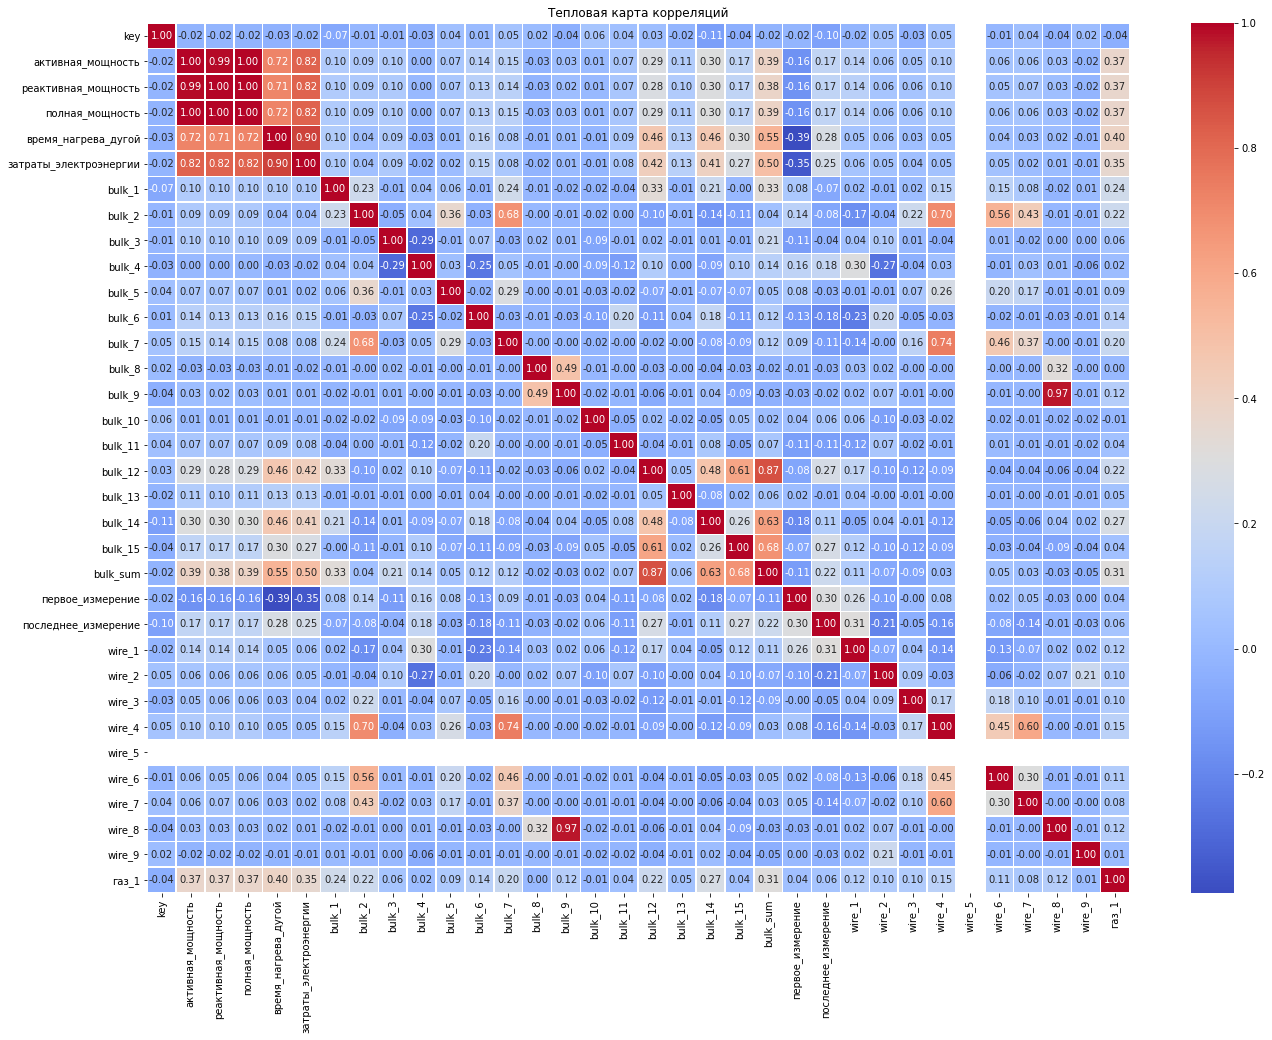

In [82]:
correlation_matrix = data_all.corr() 

plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

Видим, что нет зависимости целевого признака от параметров, значит между ними слабая линейная зависимость, но вероятно есть нелинейная. 
Высокая корреляция между признаками (мощности) может привести к проблеме мультиколлинеарности, поэтому оставим для работы только полную мощность. 

bulk_9 имеет высокую корреляцию с wire_8. Посмотрим, нужен ли нам этот параметр 

In [83]:
len(data_all.query('bulk_9 != 0')) 

13

Значений, отличных от нуля, мало, признак можно удалить 

Также проверим bulk_12, у него высокое значение корреляции с bulk_7 

In [84]:
len(data_all.query('bulk_12 == 0'))

508

Его тоже удали из итоговой таблицы 

In [85]:
data = data_all.drop(['bulk_9', 'bulk_12', 'активная_мощность', 'реактивная_мощность', 'key'], axis=1) 

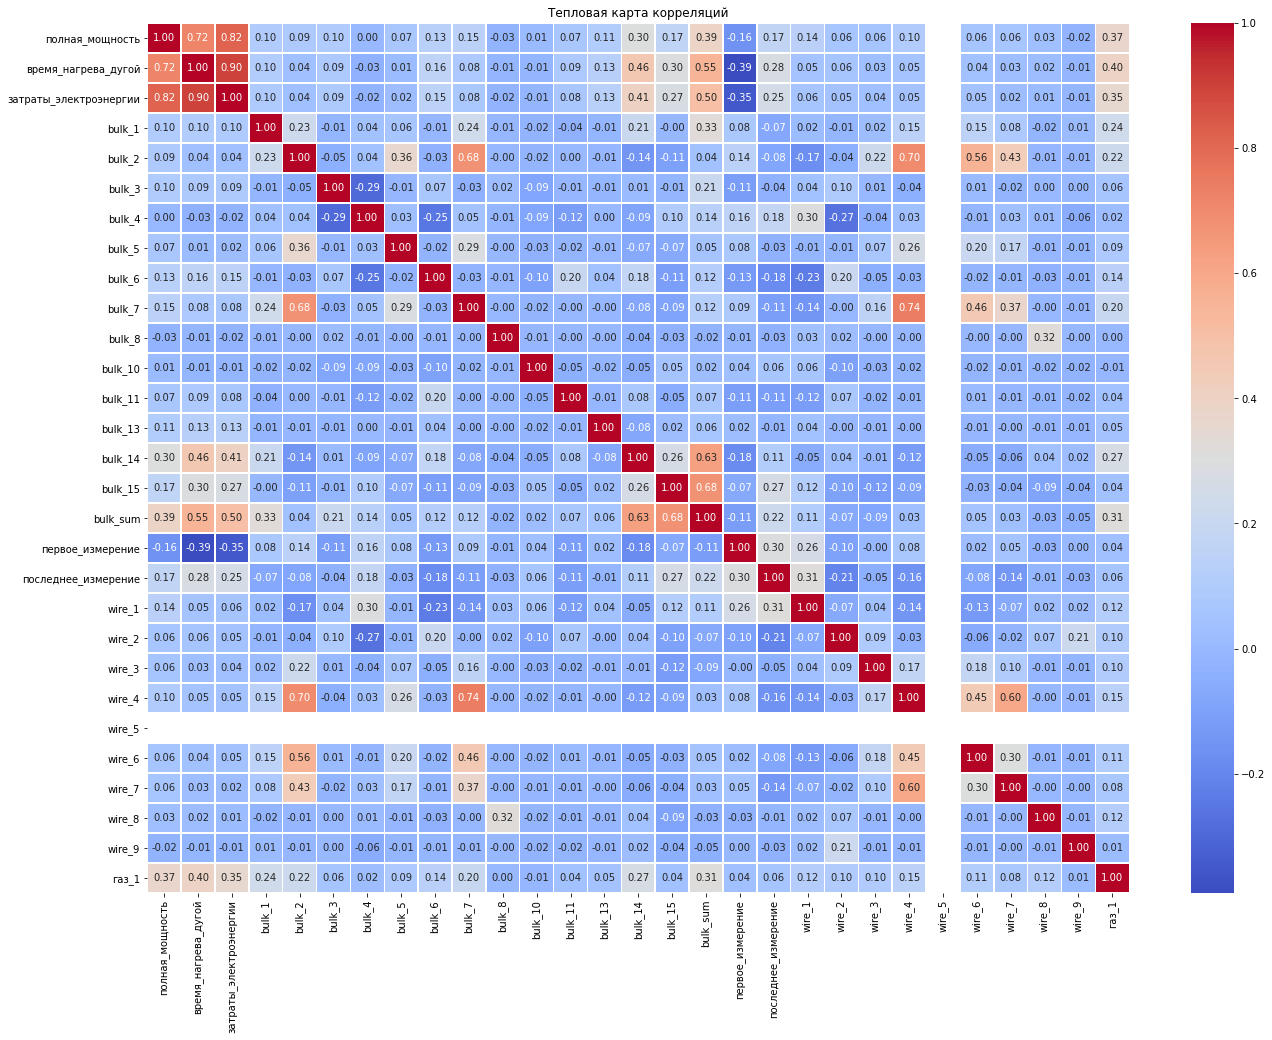

In [86]:
correlation_matrix = data.corr() 

# Построение тепловой карты корреляций
plt.figure(figsize=(22, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляций')
plt.show()

На текущем шаге мы проверили зависимость признаков и избавились от мультиколлиреарности, удалив несколько присадок. 
Также выясними, что у целевого признака слабая линейная зависимость от параметров, что говорит о том, что скорее сработает модель случайного леса, чем линейная регресси, проверим это далее. 

## Шаг 5. Подготовка данных 

Разделим данные на 2 выборки 

In [91]:
X = data.drop('последнее_измерение', axis=1)
y = data['последнее_измерение'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25,
    random_state=RANDOM_STATE)

Стандартизируем признаки обучающей выборки 

In [92]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)

Выборки готовы к обучению моделей. 

## Шаг 6. Обучение моделей машинного обучения 

Начнем с линейной регрессии 

In [93]:
model_lr = LinearRegression() 

In [94]:
scores = cross_val_score(model_lr, X=X_train_scaler, y=y_train, cv=5, scoring='neg_mean_absolute_error') 
mae_lr = round(abs(scores.mean()), 2) 

In [95]:
mae_lr 

6.25

Как и было видно на тепловой карте, линейная зависимость слабая 

Попробуем RandomForestRegressor 

In [106]:
model = RandomForestRegressor()
params = {
    'n_estimators': [10, 50, 80],
    'max_depth': [15, 20, 25],
    'min_samples_split': [2, 3, 4],
    'bootstrap': [True, False],
    'random_state': [RANDOM_STATE]
}
model_rf = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error')
model_rf.fit(X_train, y_train)
model_rf.best_params_


{'bootstrap': True,
 'max_depth': 15,
 'min_samples_split': 2,
 'n_estimators': 80,
 'random_state': 280125}

In [98]:
mae_rf = round(abs(model_rf.best_score_), 2) 
mae_rf 

6.16

In [99]:
model = CatBoostRegressor() 
parameters = [{'learning_rate':[0.01, 0.03, 0.1, 0.05, 0.08], 'random_state':[RANDOM_STATE], 'verbose':[False]}]
model_cbr = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error')
model_cbr.fit(X_train, y_train)
print(model_cbr.best_params_) 

{'learning_rate': 0.01, 'random_state': 280125, 'verbose': False}


In [107]:
mae_cbr = round(abs(model_cbr.best_score_), 2) 
mae_cbr 

6.0

Модель также показала хороший результат 

## Шаг 7. Выбор лучшей модели 

In [101]:
results = pd.DataFrame({
    'Модель': ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor'],
    'MAE': [mae_lr, mae_rf, mae_cbr]
}) 

In [102]:
results

,Модель,MAE
0,LinearRegression,6.25
1,RandomForestRegressor,6.16
2,CatBoostRegressor,6.00


Проверим лучшую модель на тестовых данных 

In [103]:
y_pred = model_cbr.best_estimator_.predict(X_test)

In [105]:
mae_cbr = round(mean_absolute_error(y_test, y_pred), 2) 
mae_cbr

6.64

 98%|===================| 1692/1719 [00:51<00:00]        

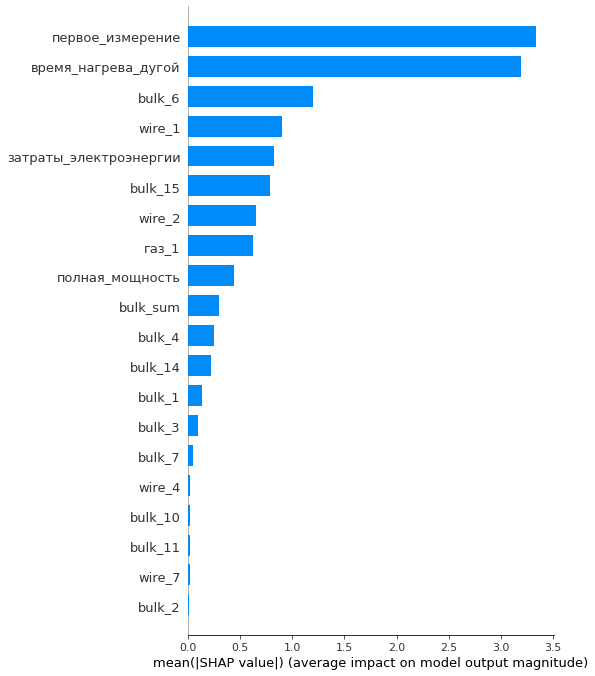

In [115]:
explainer = shap.Explainer(model_rf, X_train)
shap_values = explainer(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar") 

Самыми важными прикзаками модели CatBoostRegressor являются начальная температура (первое измерение) и время нагрева дугой,  далее в порядке убывания видимм на графике 

Модель CatBoostRegressor показала лучший результат, МАЕ на тестовой выборке составляет 6.64 

## Шаг 8. Общий вывод и рекомендации заказчику 

В ходе выполнения задачи оптимизации производственных расходов металлургического комбината Стальная птица были проведены следуюшие этапы работы: 

- загружены данные и проверены на аномалии и выбросы, которые были удалены 
- данные были подготовлены, пропуски заменены на 0 и в некоторых случаях удалены 
- добавлены столбцы - полная мощность, сумма присыпок, время нагрева, начальнач и конечная температуры объекта. Конечная температура является целевым признаком 
- проведен корреляционный анализ и выявлена мильтиколлинеарность, чтобы ее избежать были удалены признаки активной и реактивной мощностей и некоторые данные о присадках 
- данные были разделены на тестовую и тренровочную выборки для дальнейшего обучения моделей 
- обучены модели Линейная регрессия, RandomForestRegressor и CatBoostRegressor 

Лучший результат на тренировочной выборке показала модель CatBoostRegressor, показав значение МАЕ 6.0  
Она была применена к тестовой выборке, на которой результат составил 6.64 

По итогу модель RandomForestRegressor может быть использована заказчиком для оптимизации производственных расходов. 